In [2]:
def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = '/home/nerton/Projects/kaggle'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path


In [3]:
import pandas as pd

# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Carregar o arquivo CSV
try:
    df = pd.read_csv(file_path)
    df.info()  # Exibir informações gerais do dataset
    df.head()  # Exibir as primeiras linhas
except Exception as e:
    str(e)


# Definir os intervalos de idade
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "65+"]

# Criar a nova variável categorizada
df["Faixa_Idade"] = pd.cut(df["('P1_a ', 'Idade')"], bins=bins, labels=labels, right=False)

# Exibir a contagem por faixa etária
df["Faixa_Idade"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 399 entries, ('P0', 'id') to ('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')
dtypes: float64(328), int64(2), object(69)
memory usage: 16.1+ MB


Faixa_Idade
26-35    3031
36-45    1219
18-25     671
46-55     300
56-65      65
65+         7
<18         0
Name: count, dtype: int64

Distribuição das Faixas Etárias:
Faixa_Idade
26-35    3031
36-45    1219
18-25     671
46-55     300
56-65      65
65+         7
<18         0
Name: count, dtype: int64
Estrutura da Rede Bayesiana:
[('Faixa_Idade', "('P1_l ', 'Nivel de Ensino')"), ("('P1_l ', 'Nivel de Ensino')", "('P2_h ', 'Faixa salarial')")]


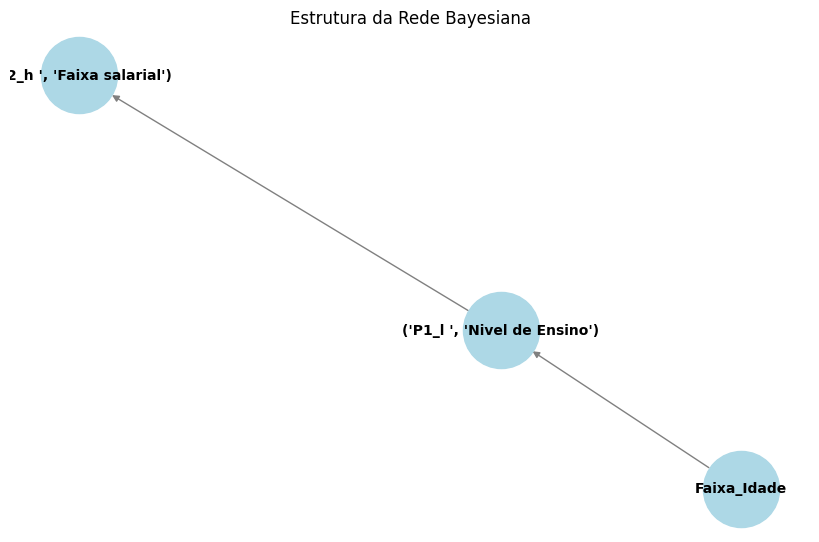


Probabilidades para a faixa salarial dado o nível de ensino 'Graduação/Bacharelado':
+------------------------------------------------------+----------------------+ 
| Faixa Salarial                                      | Probabilidade        |
+------------------------------------------------------+----------------------+ 
| Acima de R$ 40.001/mês                             | 0.0110              |
| Menos de R$ 1.000/mês                              | 0.0055              |
| de R$ 1.001/mês a R$ 2.000/mês                     | 0.0329              |
| de R$ 101/mês a R$ 2.000/mês                       | 0.0000              |
| de R$ 12.001/mês a R$ 16.000/mês                   | 0.1109              |
| de R$ 16.001/mês a R$ 20.000/mês                   | 0.0579              |
| de R$ 2.001/mês a R$ 3.000/mês                     | 0.0743              |
| de R$ 20.001/mês a R$ 25.000/mês                   | 0.0256              |
| de R$ 25.001/mês a R$ 30.000/mês                   | 0.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Definir os intervalos de idade
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Criar a nova variável categorizada
df['Faixa_Idade'] = pd.cut(df["('P1_a ', 'Idade')"], bins=bins, labels=labels, right=False)
print("Distribuição das Faixas Etárias:")
print(df['Faixa_Idade'].value_counts())

# Definir a estrutura da rede bayesiana
dependency_structure = [
    ('Faixa_Idade', "('P1_l ', 'Nivel de Ensino')"),
    ("('P1_l ', 'Nivel de Ensino')", "('P2_h ', 'Faixa salarial')")
]
model = BayesianNetwork(dependency_structure)

# Ajustar o modelo aos dados
model.fit(df, estimator=MaximumLikelihoodEstimator)
print("Estrutura da Rede Bayesiana:")
print(model.edges())

# Plotar o gráfico da rede bayesiana
def plotar_rede(model):
    plt.figure(figsize=(8, 5))
    G = nx.DiGraph()
    G.add_edges_from(model.edges())
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    plt.title("Estrutura da Rede Bayesiana")
    plt.show()

plotar_rede(model)

# Criar um objeto de inferência
inference = VariableElimination(model)

# Exemplo de consulta probabilística
def consulta_probabilidade(nivel_ensino):
    query_result = inference.query(variables=["('P2_h ', 'Faixa salarial')"], 
                                   evidence={"('P1_l ', 'Nivel de Ensino')": nivel_ensino})
    
    print(f"\nProbabilidades para a faixa salarial dado o nível de ensino '{nivel_ensino}':")
    print("+------------------------------------------------------+----------------------+ ")
    print("| Faixa Salarial                                      | Probabilidade        |")
    print("+------------------------------------------------------+----------------------+ ")
    for state, prob in zip(query_result.state_names["('P2_h ', 'Faixa salarial')"], query_result.values):
        print(f"| {state:<50} | {prob:.4f}              |")
    print("+------------------------------------------------------+----------------------+ ")

# Teste com Graduação/Bacharelado
consulta_probabilidade('Estudante de Graduação')
consulta_probabilidade('Graduação/Bacharelado')
consulta_probabilidade('Pós-graduação')
consulta_probabilidade('Mestrado')
consulta_probabilidade('Doutorado ou Phd')


